
<font color = lightblue> Curso ***IDASE*** - ___Inteligência de Dados Aplicada ao Setor Elétrico___

Disciplina ___Inteligência Artificial___

Doscente: _Dr. Augusto Santiago Cerqueira_

Discente: _Giovani Santiago Junqueira_

# <font color = green>***Desempenho de Classificadores - Análise de Dados***</font>

***Objetivo Principal:*** Desenvolver classificadores para o conjunto de dados “Letter Recognition” da UCI. https://archive.ics.uci.edu/static/public/59/letter+recognition.

O objetivo é identificar cada um de um grande número de displays de pixels retangulares em preto e branco como uma das 26 letras maiúsculas do alfabeto inglês. As imagens dos caracteres foram baseadas em 20 fontes diferentes e cada letra dentro dessas 20 fontes foi distorcida aleatoriamente para produzir um arquivo de 20.000 estímulos únicos. Cada estímulo foi convertido em 16 atributos numéricos primitivos (momentos estatísticos e contagens de arestas) que foram então dimensionados para caber em um intervalo de valores inteiros de 0 a 15. Normalmente treinamos nos primeiros 16.000 itens e então usamos o modelo resultante para prever a categoria de letras para os 4.000 restantes. Veja o artigo citado acima para mais detalhes.

- <font color = lightyellow>Projetar um classiﬁcardor baseado na `distância de Mahalanobis`;

  - utilizando todos os parâmetros existentes na base de dados;

  - Utilizando n parâmetros existentes na base de dados;

- Projetar um classificador baseado no`KNN (K-nearest neighbors)`;

  - utilizando todos os parâmetros existentes na base de dados;

  - Utilizando n parâmetros existentes na base de dados;

- Projetar um classificador baseado no `LDA (Linear Discriminant Analysis)`;

  - utilizando todos os parâmetros existentes na base de dados;

  - Utilizando n parâmetros existentes na base de dados;
  
  - <font color = lightyellow>Projetar um classiﬁcardor baseado em uma `rede neural MLP (Multilayer Perceptron)`;

  - utilizando todos os parâmetros existentes na base de dados;

- Projetar um classificador baseado em `máquinas de vetores de suporte não-linear (kernel função
de base radial)`;

  - utilizando todos os parâmetros existentes na base de dados;

## <font color = lightgreen>Importação das bibliotecas necessárias

### <font color = lightyellow>Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.spatial import distance
from imblearn.over_sampling import SMOTE

### <font color = lightyellow>Parametrizando os dados de entrada

In [2]:
data_id = 59 # Letter Recognition
test_size = 0.3 # Conjunto de teste = 30%
random_state = 42 # Semente para o gerador de números randômicos, garantindo a reprodutibilidade
n = 5 # Quantidades de parâmetros a ser utilizado
k = 10 # Número de visinhos mais próximos
max_inter = 1000 # número máximo de interações

### <font color = lightyellow> Carrega um conjunto de dados a partir do repositório UCI.</font>

Esta função recupera o conjunto de dados associados ao `data_id` fornecido e utiliza
a função `fetch_ucirepo` para extrair os `feaures`, os `targets`, as informações dos
metadados e as variáveis do conjunto de dado do repositório UCI, e então separa as
variáveis de entrada (`x`) da variável de saída (`y`). Ambas as variáveis são retornadas
como DataFrames do Pandas.

In [3]:
repository_dataset = fetch_ucirepo(id=data_id)
x = repository_dataset.data.features
y = repository_dataset.data.targets
metadata = repository_dataset.metadata # metadata
variables = repository_dataset.variables #variable information

In [4]:
print(metadata)

{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [5]:
print(variables)

     name     role         type demographic                    description  \
0   lettr   Target  Categorical        None                 capital letter   
1   x-box  Feature      Integer        None     horizontal position of box   
2   y-box  Feature      Integer        None       vertical position of box   
3   width  Feature      Integer        None                   width of box   
4    high  Feature      Integer        None                  height of box   
5   onpix  Feature      Integer        None              total # on pixels   
6   x-bar  Feature      Integer        None     mean x of on pixels in box   
7   y-bar  Feature      Integer        None     mean y of on pixels in box   
8   x2bar  Feature      Integer        None                mean x variance   
9   y2bar  Feature      Integer        None                mean y variance   
10  xybar  Feature      Integer        None           mean x y correlation   
11  x2ybr  Feature      Integer        None              mean of

## <font color = lightgreen>Definição das Funções


### <font color = lightyellow>Função para plotagem do mapa de calor

In [6]:
def heat_map(matrix, matrix_name):
    """ Gera e exibe um mapa de calor (heatmap) para a matriz fornecida.

    Args:
        matrix (array-like): A matriz de dados que será visualizada como um mapa de calor.
        matrix_name (str): O título que será exibido no topo do mapa de calor.
    """
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f"{matrix_name}")
    plt.show()

### <font color = lightyellow>Função para visualização da matriz de confusão

In [7]:
def disp_matriz(conf_matrix, class_name):
    """ Exibe a matriz de confusão fornecida utilizando uma visualização gráfica.

    Args:
        conf_matrix (array-like): A matriz de confusão que será exibida. Cada célula da matriz
        representa a contagem de classificações corretas e incorretas para cada classe.
        class_name (list de str): Os nomes das classes a serem exibidos nos rótulos da matriz
        de confusão.
    """
    _, ax = plt.subplots(figsize=(12,8))
    plt.title("Matriz Confusão")
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_name)
    disp.plot(ax=ax, cmap=plt.cm.Oranges)
    ax.set_xlabel('Classe Prevista', fontsize=14)
    ax.set_ylabel('Classe Real', fontsize=14)
    plt.show()

### <font color = lightyellow>Função para calcular os indicadores de desempenho: <font color = orange> 

-  ***Acurácia***

- ***Sensibilidade***

- ***Especificidade***

In [8]:
def performance_indicators(y_test, y_pred):
    """ Calcula os indicadores de desempenho do modelo: acurácia, sensibilidade e especificidade/característica,
    além de retornar a matriz de confusão.

    Args:
        y_test (array-like): Rótulos reais do conjunto de teste.
        y_pred (array-like): Rótulos previstos pelo modelo.

    Return:
        list: Uma lista contendo os indicadores de desempenho [acurácia, sensibilidade, especificidade].
        array: Matriz de confusão resultante da comparação entre os rótulos reais e os previstos.
    
    Indicadores calculados:
        - Acurácia: A proporção de previsões corretas (verdadeiros positivos + verdadeiros negativos) sobre o total.
        - Sensibilidade: A taxa de verdadeiros positivos (quantos da classe positiva foram corretamente classificados).
        - Especificidade (ou característica): A taxa de verdadeiros negativos (quantos da classe negativa foram corretamente classificados).
    """
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sensitivity = (np.diag(conf_matrix) / conf_matrix.sum(axis=1)).mean()
    caracteristic =  (np.diag(conf_matrix) / conf_matrix.sum(axis=0)).mean()
    return [accuracy, sensitivity, caracteristic], conf_matrix

### <font color = lightyellow> Função para classificar baseado na <font color = orange> ***Distância de Mahalanobis***

In [9]:
def mahalanobis_classifier(x_train_bal, x_test, y_train_bal, y_test):
    """ Implementa um classificador baseado na distância de Mahalanobis utilizando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.  

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
        
    Notas:
        A função calcula a distância de Mahalanobis entre cada amostra de teste e a média 
        de cada classe no conjunto de treino, utilizando a matriz de covariância do conjunto 
        e treino. A classe com a menor distância é atribuída à amostra.
    """
    cov_matrix = np.cov(x_train_bal, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    y_pred = []
    classes = np.unique(y_train_bal)
    for x in x_test:
        distances = []
        for c in classes:
            mean = np.mean(x_train_bal[y_train_bal == c], axis=0)
            distances.append(distance.mahalanobis(x, mean, inv_cov_matrix))
        y_pred.append(np.argmin(distances))
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para classificar baseado no  <font color = orange> ***k-NN (K-nearest neighbors)***

In [10]:
def knn_classifier(x_train_bal, x_test, y_train_bal, y_test, k):
    """ Treina um classificador k-Nearest Neighbors (k-NN) usando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.  

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        k (int): Número de vizinhos mais próximos a serem considerados pelo classificador k-NN.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_bal, y_train_bal)
    y_pred = knn.predict(x_test)
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para rclassificar baseado no <font color = orange> ***LDA (Linear Discriminant Analysis)***

In [11]:
def lda_classifier(x_train, x_test, y_train, y_test):
    """ Treina um classificador Linear Discriminant Analysis (LDA) usando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train, y_train)
    y_pred = lda.predict(x_test)
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para classificar baseado na rede neural <font color = orange> ***MLP (Multilayer Perceptron)***

In [12]:
def mlp_classifier(x_train_bal, x_test, y_train_bal, y_test, max_inter, random_state):
    """ Treina um classificador baseado em rede neural MLP (Multilayer Perceptron) com uma camada oculta e 16 neurônios.
    Realiza previsões nos dados de teste e avalia o desempenho do modelo utilizando as métricas fornecidas pela função `performance_indicators`.

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        max_inter (int): Máximo número de interações.
        random_state (int): Semente para o gerador de números randômicos, garantindo a reprodutibilidade
        
    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    mlp = MLPClassifier(hidden_layer_sizes=(x_train_bal.shape[1],), max_iter=max_inter, random_state=random_state)
    mlp.fit(x_train_bal, y_train_bal)
    y_pred = mlp.predict(x_test)
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para classificar baseado na <font color = orange> ***Máquinas de Vetores de Suporte Não-Linear (kernel função de base radial)***

In [13]:
def svm_classifier(x_train_bal, x_test, y_train_bal, y_test, random_state):
    """ Treina um classificador SVM com kernel radial (RBF) usando os dados balanceados de treinamento e avalia seu desempenho.
    
    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        random_state (int): Semente para o gerador de números randômicos, garantindo a reprodutibilidade
        
    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    svm = SVC(kernel='rbf', random_state=random_state)
    svm.fit(x_train_bal, y_train_bal)
    y_pred = svm.predict(x_test)
    return performance_indicators(y_test, y_pred)

## <font color = lightgreen>Pré-processamento

### <font color = lightyellow>***A*** - Dividindo os dados em treino e teste

`método do holdout`

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,
                                                        random_state=random_state, stratify=y)

### <font color = lightyellow>***B*** - Normaização nos dados de treino e aplicando-a nos dados de teste

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### <font color = lightyellow>***C*** - Utilizando o `SMOTE` para balanceamento das classes

In [16]:
x_train_bal, y_train_bal = SMOTE(random_state=random_state).fit_resample(x_train, y_train)

### <font color = lightyellow>***D*** - Codifinado as labels, transformando as classes em valores numéricos.

In [17]:
label_encoder = LabelEncoder()
y_train_bal = label_encoder.fit_transform(y_train_bal.values.ravel())
y_test = label_encoder.transform(y_test.values.ravel())

In [18]:
classes = label_encoder.inverse_transform(np.unique(y_train_bal))

In [19]:
classes

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

### <font color = lightyellow>***E*** - Matriz de correlação de entrada e saída

In [20]:
correlation_matrix = pd.DataFrame(x_train_bal).corr()

In [21]:
correlations = pd.Series(np.corrcoef(x_train_bal.T, y_train_bal)[-1, :-1])
top_n_corr_features = correlations.abs().sort_values(ascending=False).head(n).index
x_train_corr = x_train_bal[:, top_n_corr_features]
x_test_corr = x_test[:, top_n_corr_features]

In [22]:
top_n_corr_features

Index([10, 13, 6, 15, 11], dtype='int64')

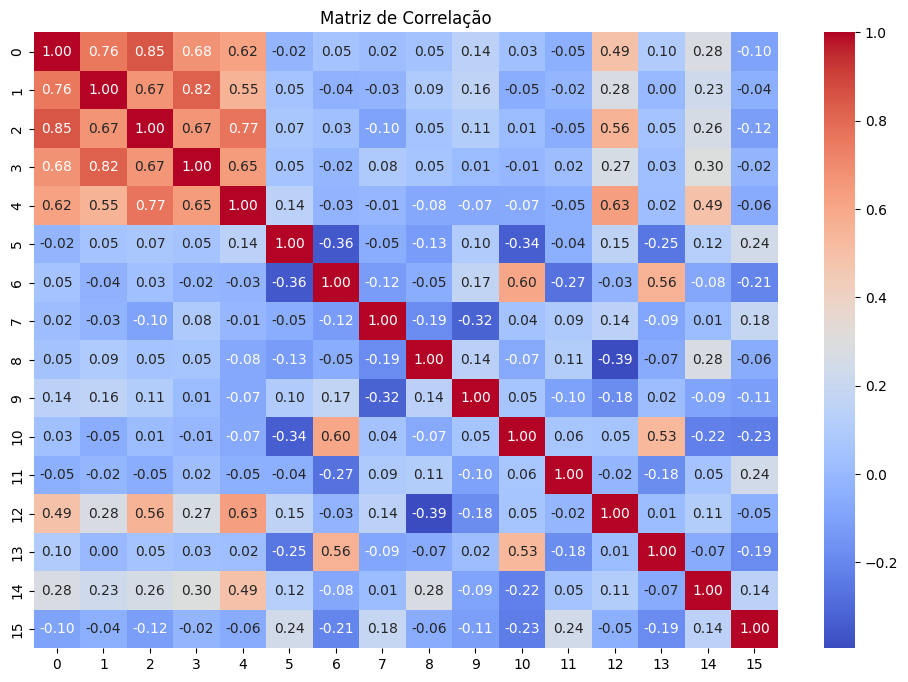

In [23]:
heat_map(correlation_matrix, "Matriz de Correlação")

### <font color = lightyellow>***F*** - Cálculo a informação mútua entre os parâmetros de entrada e a saída

In [24]:
mutual_info = mutual_info_classif(x_train_bal, y_train_bal)

In [25]:
top_n_mutual_info_features = np.argsort(mutual_info)[-n:]
x_train_mutual_info = x_train_bal[:, top_n_mutual_info_features]
x_test_mutual_info = x_test[:, top_n_mutual_info_features]

In [26]:
top_n_mutual_info_features

array([14, 13,  6, 10, 12])

### <font color = lightyellow>***G*** - Cálculo a razão discriminante de Fisher

In [27]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_bal, y_train_bal)
fisher_ratios = np.sum(np.abs(lda.coef_), axis=0)

In [28]:
top_n_fisher_features = np.argsort(fisher_ratios)[-n:]
x_train_fisher = x_train_bal[:, top_n_fisher_features]
x_test_fisher = x_test[:, top_n_fisher_features]

In [29]:
top_n_fisher_features

array([ 2,  6, 10, 14, 12])

### <font color = lightyellow>***H*** - Análise de Componentes Principais (PCA)

In [30]:
pca = PCA(n_components=n)
pca.fit(x_train_bal)
x_train_pca = pca.transform(x_train_bal)
x_test_pca = pca.transform(x_test)

In [31]:
top_n_pca_features = pca.components_

In [32]:
top_n_pca_features

array([[ 0.42761682,  0.39840055,  0.43725026,  0.3996191 ,  0.41656697,
         0.05684356, -0.00939322,  0.0023346 ,  0.00233556,  0.02474613,
        -0.02269359, -0.02194937,  0.29096931,  0.01481931,  0.20697361,
        -0.03673271],
       [ 0.07901099,  0.0075164 ,  0.05424621, -0.0012179 , -0.03407587,
        -0.32437162,  0.51115947, -0.11207989, -0.02997846,  0.13112991,
         0.47437795, -0.18170425, -0.00687729,  0.46123682, -0.16800951,
        -0.30557173],
       [ 0.04397657,  0.15225857,  0.03615962,  0.05607509, -0.10162047,
        -0.00076632, -0.01379858, -0.44307837,  0.55637659,  0.44579192,
        -0.15967035, -0.03877476, -0.43034395, -0.08491572,  0.14978816,
        -0.11605499],
       [ 0.02743414,  0.05788894, -0.06111229,  0.15234514, -0.03485855,
        -0.42560492,  0.02140094,  0.31677162,  0.3887372 , -0.32711727,
         0.20103413,  0.48205652, -0.20335589,  0.07299205,  0.27253099,
         0.18418857],
       [-0.14191429, -0.24259151, -0

## <font color = lightgreen>Processamento

In [33]:
activity = pd.DataFrame(columns=['accuracy', 'sensitivity', 'caracteristic'], 
                        index=['mahalanobis','mahalanobis_corr', 'mahalanobis_mutual',
                               'mahalanobis_fisher', 'mahalanobis_pca', 'knn','knn_corr',
                               'knn_mutual','knn_fisher', 'knn_pca', 'lda','lda_corr',
                               'lda_mutual','lda_fisher', 'lda_pca', 'mlp', 'svm'])

### <font color = yellow> Classificadores baseado na Distância de Mahalanobis

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

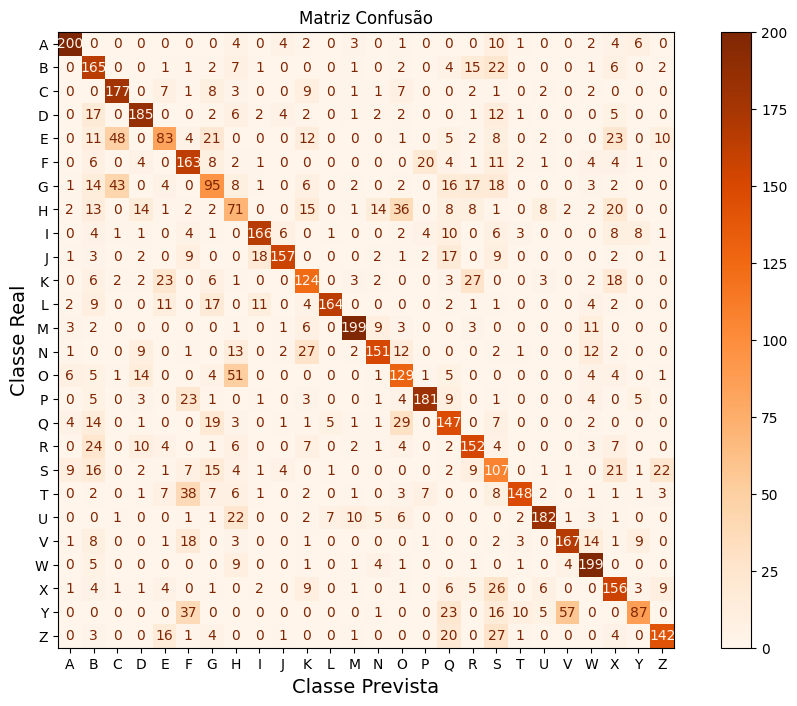

In [34]:
# avaliando o classificador com todos os parâmetros
activity.loc['mahalanobis'], conf_matrix_all = mahalanobis_classifier(x_train_bal, x_test, y_train_bal, y_test)

disp_matriz(conf_matrix_all, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

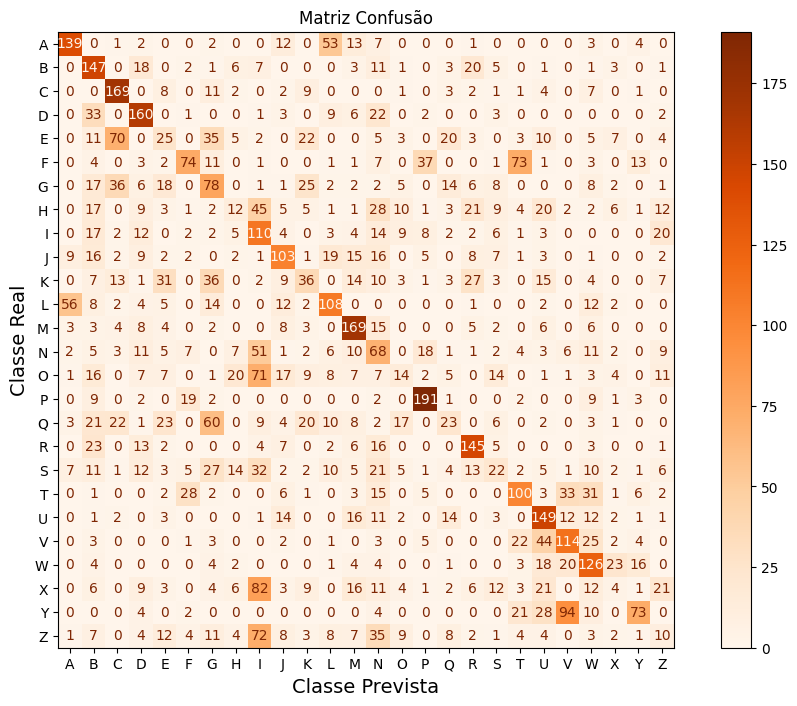

In [35]:
# Distância de Mahalanobis com n parâmetros de maior correlação
activity.loc['mahalanobis_corr'], conf_matrix_corr = mahalanobis_classifier(x_train_corr, x_test_corr, y_train_bal, y_test)

disp_matriz(conf_matrix_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

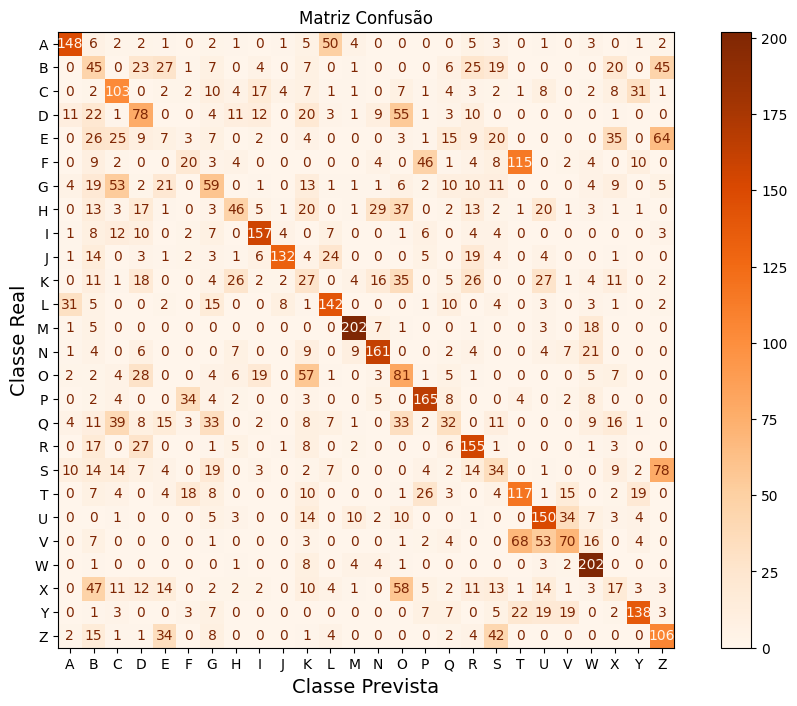

In [36]:
# Distância de Mahalanobis com n parâmetros de maior informação mútua
activity.loc['mahalanobis_mutual'], conf_matrix_mutual_info = mahalanobis_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test)

disp_matriz(conf_matrix_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

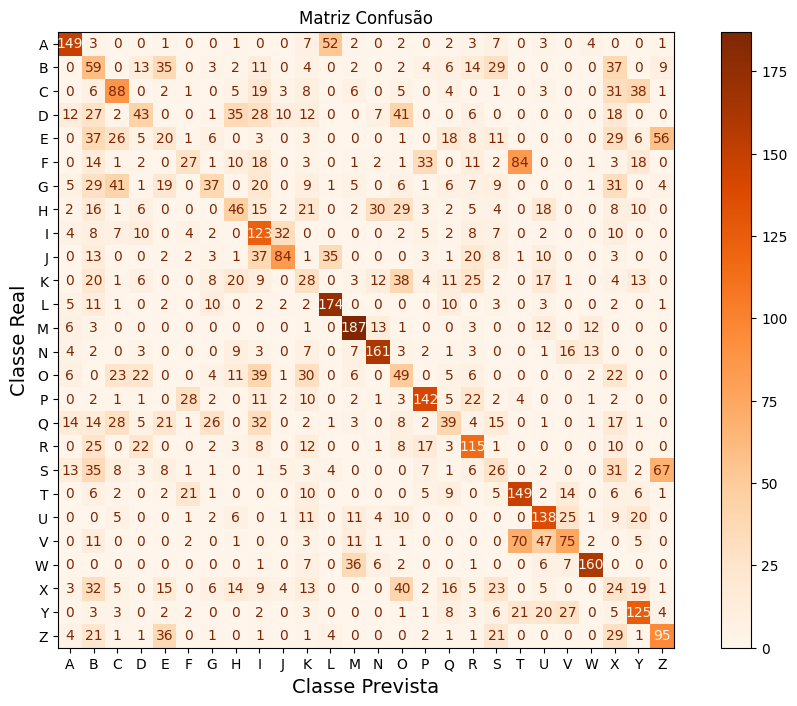

In [37]:
# Distância de Mahalanobis com n parâmetros de maior razão discriminante de Fisher
activity.loc['mahalanobis_fisher'], conf_matrix_fisher = mahalanobis_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test)

disp_matriz(conf_matrix_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

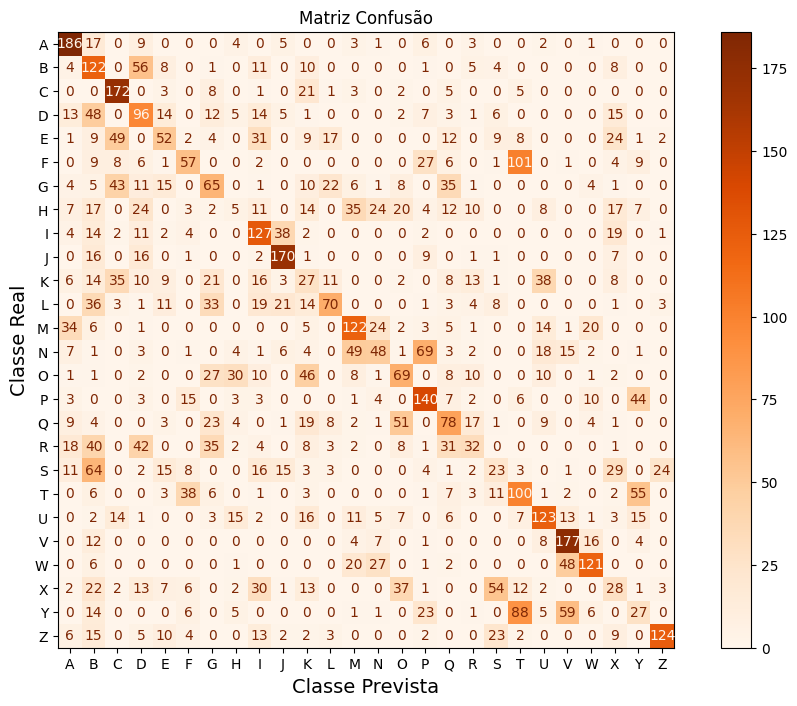

In [38]:
# Distância de Mahalanobis com n parâmetros da PCA
activity.loc['mahalanobis_pca'], conf_matrix_pca  = mahalanobis_classifier(x_train_pca, x_test_pca, y_train_bal, y_test)

disp_matriz(conf_matrix_pca, classes)

### <font color = yellow> Classificadores baseado no k-NN

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

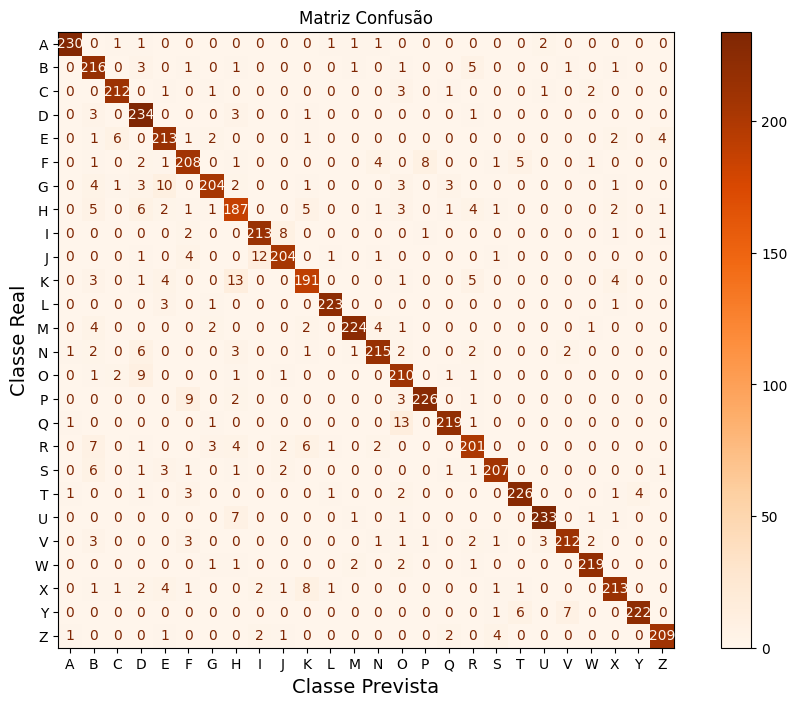

In [39]:
# avaliando o classificador com todos os parâmetros
activity.loc['knn'], conf_matrix_knn = knn_classifier(x_train_bal, x_test, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn, classes)

- <font color = lightyellow>Projetar um classiﬁcardor baseado na `distância de Mahalanobis`;

  - utilizando todos os parâmetros existentes na base de dados;

  - Utilizando n parâmetros existentes na base de dados;

- Projetar um classificador baseado no`KNN (K-nearest neighbors)`;

  - utilizando todos os parâmetros existentes na base de dados;

  - Utilizando n parâmetros existentes na base de dados;

- Projetar um classificador baseado no `LDA (Linear Discriminant Analysis)`;

  - utilizando todos os parâmetros existentes na base de dados;

  - Utilizando n parâmetros existentes na base de dados;
  
  - <font color = lightyellow>Projetar um classiﬁcardor baseado em uma `rede neural MLP (Multilayer Perceptron)`;

  - utilizando todos os parâmetros existentes na base de dados;

- Projetar um classificador baseado em `máquinas de vetores de suporte não-linear (kernel função
de base radial)`;

  - utilizando todos os parâmetros existentes na base de dados;

## <font color = lightgreen>Importação das bibliotecas necessárias

### <font color = lightyellow>Importando as bibliotecas necessárias

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.spatial import distance
from imblearn.over_sampling import SMOTE

### <font color = lightyellow>Parametrizando os dados de entrada

In [41]:
data_id = 59 # Letter Recognition
test_size = 0.3 # Conjunto de teste = 30%
random_state = 42 # Semente para o gerador de números randômicos, garantindo a reprodutibilidade
n = 5 # Quantidades de parâmetros a ser utilizado
k = 10 # Número de visinhos mais próximos
max_inter = 1000 # número máximo de interações

### <font color = lightyellow> Carrega um conjunto de dados a partir do repositório UCI.</font>

Esta função recupera o conjunto de dados associados ao `data_id` fornecido e utiliza
a função `fetch_ucirepo` para extrair os `feaures`, os `targets`, as informações dos
metadados e as variáveis do conjunto de dado do repositório UCI, e então separa as
variáveis de entrada (`x`) da variável de saída (`y`). Ambas as variáveis são retornadas
como DataFrames do Pandas.

In [42]:
repository_dataset = fetch_ucirepo(id=data_id)
x = repository_dataset.data.features
y = repository_dataset.data.targets
metadata = repository_dataset.metadata # metadata
variables = repository_dataset.variables #variable information

In [43]:
print(metadata)

{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [44]:
print(variables)

     name     role         type demographic                    description  \
0   lettr   Target  Categorical        None                 capital letter   
1   x-box  Feature      Integer        None     horizontal position of box   
2   y-box  Feature      Integer        None       vertical position of box   
3   width  Feature      Integer        None                   width of box   
4    high  Feature      Integer        None                  height of box   
5   onpix  Feature      Integer        None              total # on pixels   
6   x-bar  Feature      Integer        None     mean x of on pixels in box   
7   y-bar  Feature      Integer        None     mean y of on pixels in box   
8   x2bar  Feature      Integer        None                mean x variance   
9   y2bar  Feature      Integer        None                mean y variance   
10  xybar  Feature      Integer        None           mean x y correlation   
11  x2ybr  Feature      Integer        None              mean of

## <font color = lightgreen>Definição das Funções


### <font color = lightyellow>Função para plotagem do mapa de calor

In [45]:
def heat_map(matrix, matrix_name):
    """ Gera e exibe um mapa de calor (heatmap) para a matriz fornecida.

    Args:
        matrix (array-like): A matriz de dados que será visualizada como um mapa de calor.
        matrix_name (str): O título que será exibido no topo do mapa de calor.
    """
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f"{matrix_name}")
    plt.show()

### <font color = lightyellow>Função para visualização da matriz de confusão

In [46]:
def disp_matriz(conf_matrix, class_name):
    """ Exibe a matriz de confusão fornecida utilizando uma visualização gráfica.

    Args:
        conf_matrix (array-like): A matriz de confusão que será exibida. Cada célula da matriz
        representa a contagem de classificações corretas e incorretas para cada classe.
        class_name (list de str): Os nomes das classes a serem exibidos nos rótulos da matriz
        de confusão.
    """
    _, ax = plt.subplots(figsize=(12,8))
    plt.title("Matriz Confusão")
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_name)
    disp.plot(ax=ax, cmap=plt.cm.Oranges)
    ax.set_xlabel('Classe Prevista', fontsize=14)
    ax.set_ylabel('Classe Real', fontsize=14)
    plt.show()

### <font color = lightyellow>Função para calcular os indicadores de desempenho: <font color = orange> 

-  ***Acurácia***

- ***Sensibilidade***

- ***Especificidade***

In [47]:
def performance_indicators(y_test, y_pred):
    """ Calcula os indicadores de desempenho do modelo: acurácia, sensibilidade e especificidade/característica,
    além de retornar a matriz de confusão.

    Args:
        y_test (array-like): Rótulos reais do conjunto de teste.
        y_pred (array-like): Rótulos previstos pelo modelo.

    Return:
        list: Uma lista contendo os indicadores de desempenho [acurácia, sensibilidade, especificidade].
        array: Matriz de confusão resultante da comparação entre os rótulos reais e os previstos.
    
    Indicadores calculados:
        - Acurácia: A proporção de previsões corretas (verdadeiros positivos + verdadeiros negativos) sobre o total.
        - Sensibilidade: A taxa de verdadeiros positivos (quantos da classe positiva foram corretamente classificados).
        - Especificidade (ou característica): A taxa de verdadeiros negativos (quantos da classe negativa foram corretamente classificados).
    """
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sensitivity = (np.diag(conf_matrix) / conf_matrix.sum(axis=1)).mean()
    caracteristic =  (np.diag(conf_matrix) / conf_matrix.sum(axis=0)).mean()
    return [accuracy, sensitivity, caracteristic], conf_matrix

### <font color = lightyellow> Função para classificar baseado na <font color = orange> ***Distância de Mahalanobis***

In [48]:
def mahalanobis_classifier(x_train_bal, x_test, y_train_bal, y_test):
    """ Implementa um classificador baseado na distância de Mahalanobis utilizando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.  

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
        
    Notas:
        A função calcula a distância de Mahalanobis entre cada amostra de teste e a média 
        de cada classe no conjunto de treino, utilizando a matriz de covariância do conjunto 
        e treino. A classe com a menor distância é atribuída à amostra.
    """
    cov_matrix = np.cov(x_train_bal, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    y_pred = []
    classes = np.unique(y_train_bal)
    for x in x_test:
        distances = []
        for c in classes:
            mean = np.mean(x_train_bal[y_train_bal == c], axis=0)
            distances.append(distance.mahalanobis(x, mean, inv_cov_matrix))
        y_pred.append(np.argmin(distances))
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para classificar baseado no  <font color = orange> ***k-NN (K-nearest neighbors)***

In [49]:
def knn_classifier(x_train_bal, x_test, y_train_bal, y_test, k):
    """ Treina um classificador k-Nearest Neighbors (k-NN) usando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.  

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        k (int): Número de vizinhos mais próximos a serem considerados pelo classificador k-NN.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_bal, y_train_bal)
    y_pred = knn.predict(x_test)
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para rclassificar baseado no <font color = orange> ***LDA (Linear Discriminant Analysis)***

In [50]:
def lda_classifier(x_train, x_test, y_train, y_test):
    """ Treina um classificador Linear Discriminant Analysis (LDA) usando os dados de treino balanceados,
    realiza previsões nos dados de teste e avalia o desempenho do modelo.

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.

    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train, y_train)
    y_pred = lda.predict(x_test)
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para classificar baseado na rede neural <font color = orange> ***MLP (Multilayer Perceptron)***

In [51]:
def mlp_classifier(x_train_bal, x_test, y_train_bal, y_test, max_inter, random_state):
    """ Treina um classificador baseado em rede neural MLP (Multilayer Perceptron) com uma camada oculta e 16 neurônios.
    Realiza previsões nos dados de teste e avalia o desempenho do modelo utilizando as métricas fornecidas pela função `performance_indicators`.

    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        max_inter (int): Máximo número de interações.
        random_state (int): Semente para o gerador de números randômicos, garantindo a reprodutibilidade
        
    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    mlp = MLPClassifier(hidden_layer_sizes=(x_train_bal.shape[1],), max_iter=max_inter, random_state=random_state)
    mlp.fit(x_train_bal, y_train_bal)
    y_pred = mlp.predict(x_test)
    return performance_indicators(y_test, y_pred)

### <font color = lightyellow> Função para classificar baseado na <font color = orange> ***Máquinas de Vetores de Suporte Não-Linear (kernel função de base radial)***

In [52]:
def svm_classifier(x_train_bal, x_test, y_train_bal, y_test, random_state):
    """ Treina um classificador SVM com kernel radial (RBF) usando os dados balanceados de treinamento e avalia seu desempenho.
    
    Args:
        x_train (array-like): Dados de treino usados para treinar o modelo.
        x_test (array-like): Dados de teste usados para avaliar o modelo.
        y_train (array-like): Rótulos das classes correspondentes aos dados de treino balanceados.
        y_test (array-like): Rótulos das classes correspondentes aos dados de teste.
        random_state (int): Semente para o gerador de números randômicos, garantindo a reprodutibilidade
        
    Return:
        metrics (list): Uma lista contendo as seguintes métricas de desempenho:
            - accuracy (float): A precisão do modelo, calculada como a proporção de previsões corretas.
            - sensitivity (float): A sensibilidade do modelo, calculada como a média das taxas de verdadeiros positivos por classe.
            - specificity (float): A especificidade do modelo, calculada como a média das taxas de verdadeiros negativos por classe.
        conf_matrix (array-like): A matriz de confusão, que mostra o desempenho do modelo em termos de 
        verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
    """
    svm = SVC(kernel='rbf', random_state=random_state)
    svm.fit(x_train_bal, y_train_bal)
    y_pred = svm.predict(x_test)
    return performance_indicators(y_test, y_pred)

## <font color = lightgreen>Pré-processamento

### <font color = lightyellow>***A*** - Dividindo os dados em treino e teste

`método do holdout`

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,
                                                        random_state=random_state, stratify=y)

### <font color = lightyellow>***B*** - Normaização nos dados de treino e aplicando-a nos dados de teste

In [54]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### <font color = lightyellow>***C*** - Utilizando o `SMOTE` para balanceamento das classes

In [55]:
x_train_bal, y_train_bal = SMOTE(random_state=random_state).fit_resample(x_train, y_train)

### <font color = lightyellow>***D*** - Codifinado as labels, transformando as classes em valores numéricos.

In [56]:
label_encoder = LabelEncoder()
y_train_bal = label_encoder.fit_transform(y_train_bal.values.ravel())
y_test = label_encoder.transform(y_test.values.ravel())

In [57]:
classes = label_encoder.inverse_transform(np.unique(y_train_bal))

In [58]:
classes

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

### <font color = lightyellow>***E*** - Matriz de correlação de entrada e saída

In [59]:
correlation_matrix = pd.DataFrame(x_train_bal).corr()

In [60]:
correlations = pd.Series(np.corrcoef(x_train_bal.T, y_train_bal)[-1, :-1])
top_n_corr_features = correlations.abs().sort_values(ascending=False).head(n).index
x_train_corr = x_train_bal[:, top_n_corr_features]
x_test_corr = x_test[:, top_n_corr_features]

In [61]:
top_n_corr_features

Index([10, 13, 6, 15, 11], dtype='int64')

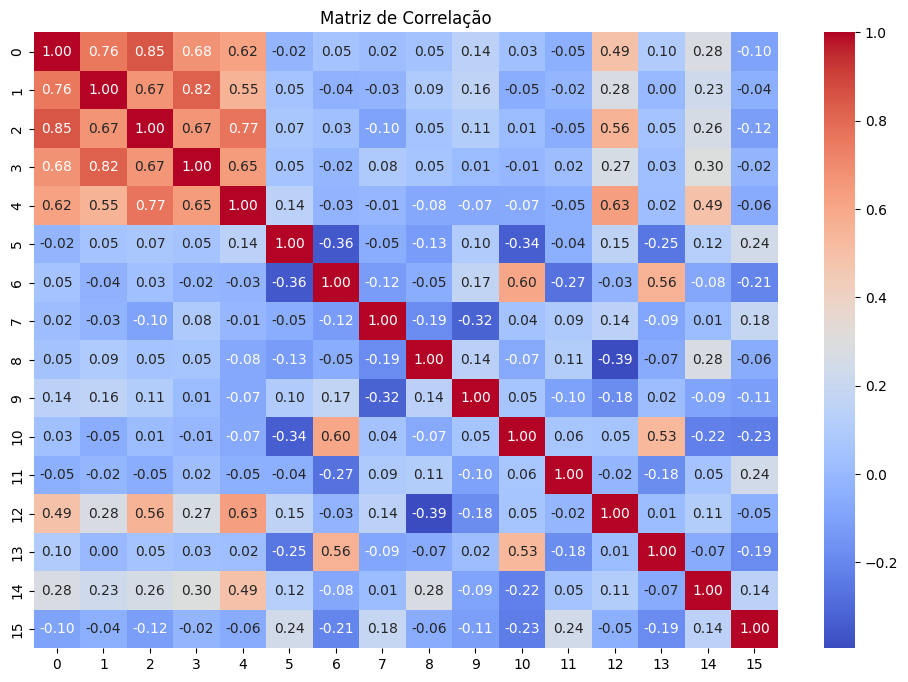

In [62]:
heat_map(correlation_matrix, "Matriz de Correlação")

### <font color = lightyellow>***F*** - Cálculo a informação mútua entre os parâmetros de entrada e a saída

In [63]:
mutual_info = mutual_info_classif(x_train_bal, y_train_bal)

In [64]:
top_n_mutual_info_features = np.argsort(mutual_info)[-n:]
x_train_mutual_info = x_train_bal[:, top_n_mutual_info_features]
x_test_mutual_info = x_test[:, top_n_mutual_info_features]

In [65]:
top_n_mutual_info_features

array([14, 13,  6, 10, 12])

### <font color = lightyellow>***G*** - Cálculo a razão discriminante de Fisher

In [66]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_bal, y_train_bal)
fisher_ratios = np.sum(np.abs(lda.coef_), axis=0)

In [67]:
top_n_fisher_features = np.argsort(fisher_ratios)[-n:]
x_train_fisher = x_train_bal[:, top_n_fisher_features]
x_test_fisher = x_test[:, top_n_fisher_features]

In [68]:
top_n_fisher_features

array([ 2,  6, 10, 14, 12])

### <font color = lightyellow>***H*** - Análise de Componentes Principais (PCA)

In [69]:
pca = PCA(n_components=n)
pca.fit(x_train_bal)
x_train_pca = pca.transform(x_train_bal)
x_test_pca = pca.transform(x_test)

In [70]:
top_n_pca_features = pca.components_

In [71]:
top_n_pca_features

array([[ 0.42761682,  0.39840055,  0.43725026,  0.3996191 ,  0.41656697,
         0.05684356, -0.00939322,  0.0023346 ,  0.00233556,  0.02474613,
        -0.02269359, -0.02194937,  0.29096931,  0.01481931,  0.20697361,
        -0.03673271],
       [ 0.07901099,  0.0075164 ,  0.05424621, -0.0012179 , -0.03407587,
        -0.32437162,  0.51115947, -0.11207989, -0.02997846,  0.13112991,
         0.47437795, -0.18170425, -0.00687729,  0.46123682, -0.16800951,
        -0.30557173],
       [ 0.04397657,  0.15225857,  0.03615962,  0.05607509, -0.10162047,
        -0.00076632, -0.01379858, -0.44307837,  0.55637659,  0.44579192,
        -0.15967035, -0.03877476, -0.43034395, -0.08491572,  0.14978816,
        -0.11605499],
       [ 0.02743414,  0.05788894, -0.06111229,  0.15234514, -0.03485855,
        -0.42560492,  0.02140094,  0.31677162,  0.3887372 , -0.32711727,
         0.20103413,  0.48205652, -0.20335589,  0.07299205,  0.27253099,
         0.18418857],
       [-0.14191429, -0.24259151, -0

## <font color = lightgreen>Processamento

In [72]:
activity = pd.DataFrame(columns=['accuracy', 'sensitivity', 'caracteristic'], 
                        index=['mahalanobis','mahalanobis_corr', 'mahalanobis_mutual',
                               'mahalanobis_fisher', 'mahalanobis_pca', 'knn','knn_corr',
                               'knn_mutual','knn_fisher', 'knn_pca', 'lda','lda_corr',
                               'lda_mutual','lda_fisher', 'lda_pca', 'mlp', 'svm'])

### <font color = yellow> Classificadores baseado na Distância de Mahalanobis

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

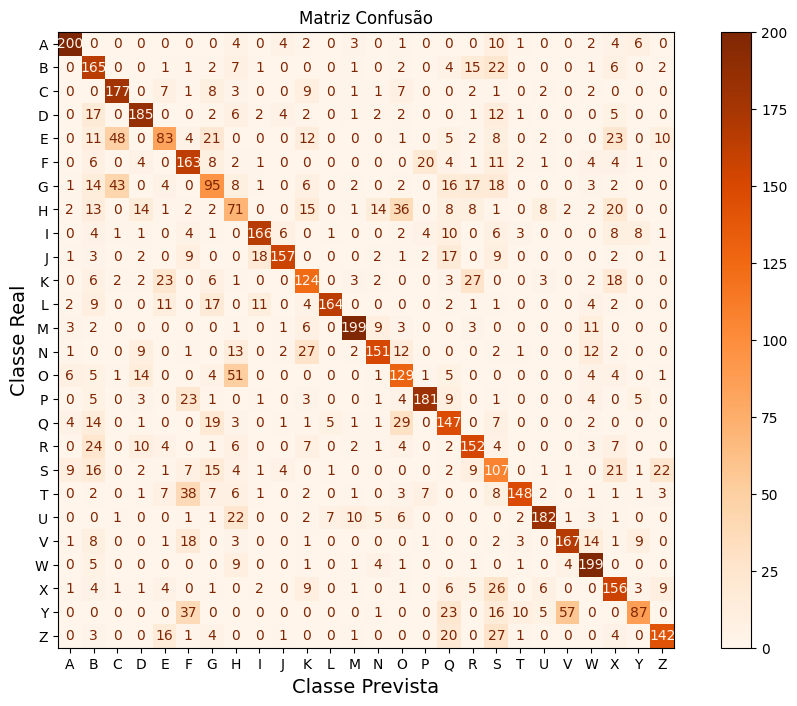

In [73]:
# avaliando o classificador com todos os parâmetros
activity.loc['mahalanobis'], conf_matrix_all = mahalanobis_classifier(x_train_bal, x_test, y_train_bal, y_test)

disp_matriz(conf_matrix_all, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

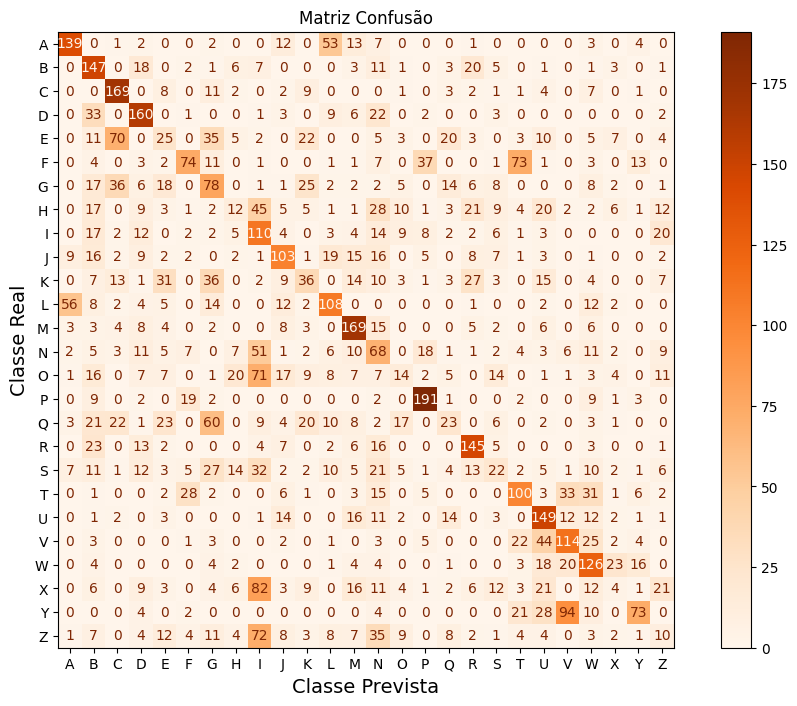

In [74]:
# Distância de Mahalanobis com n parâmetros de maior correlação
activity.loc['mahalanobis_corr'], conf_matrix_corr = mahalanobis_classifier(x_train_corr, x_test_corr, y_train_bal, y_test)

disp_matriz(conf_matrix_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

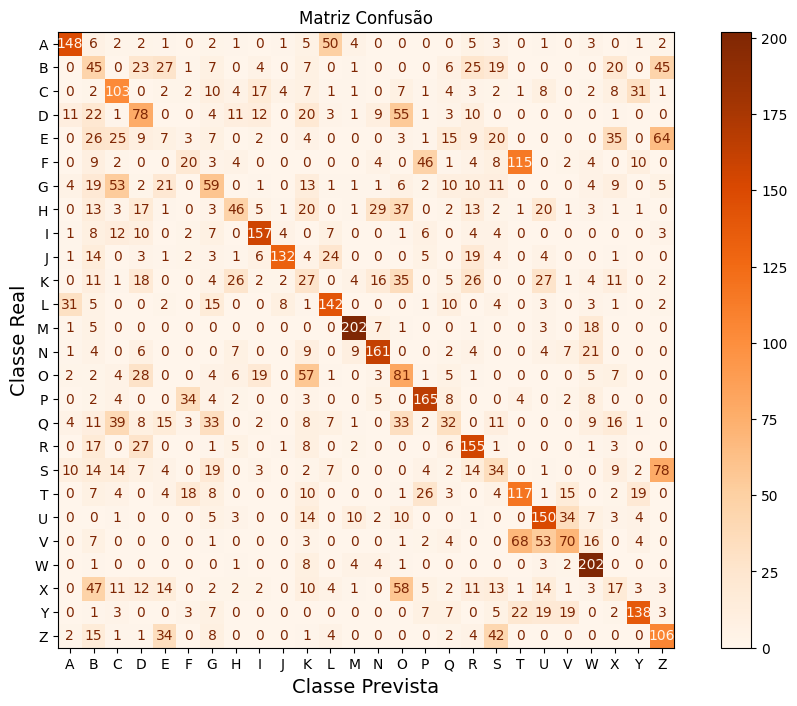

In [75]:
# Distância de Mahalanobis com n parâmetros de maior informação mútua
activity.loc['mahalanobis_mutual'], conf_matrix_mutual_info = mahalanobis_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test)

disp_matriz(conf_matrix_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

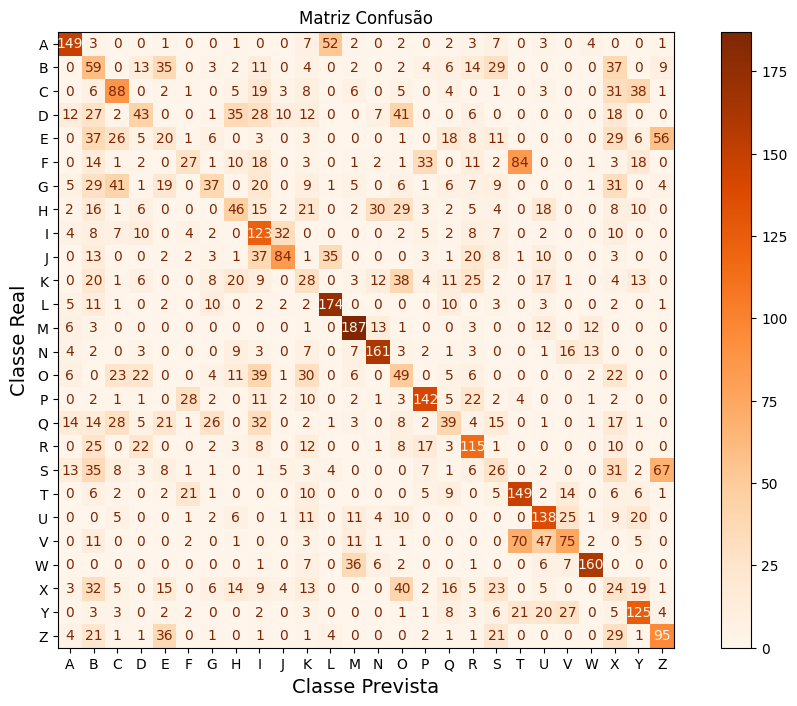

In [76]:
# Distância de Mahalanobis com n parâmetros de maior razão discriminante de Fisher
activity.loc['mahalanobis_fisher'], conf_matrix_fisher = mahalanobis_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test)

disp_matriz(conf_matrix_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

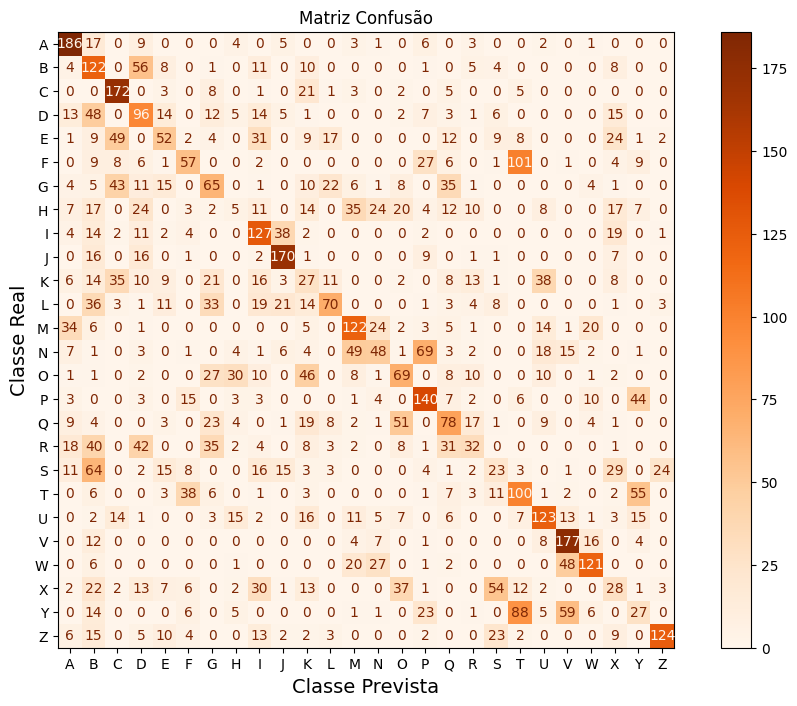

In [77]:
# Distância de Mahalanobis com n parâmetros da PCA
activity.loc['mahalanobis_pca'], conf_matrix_pca  = mahalanobis_classifier(x_train_pca, x_test_pca, y_train_bal, y_test)

disp_matriz(conf_matrix_pca, classes)

### <font color = yellow> Classificadores baseado no k-NN

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

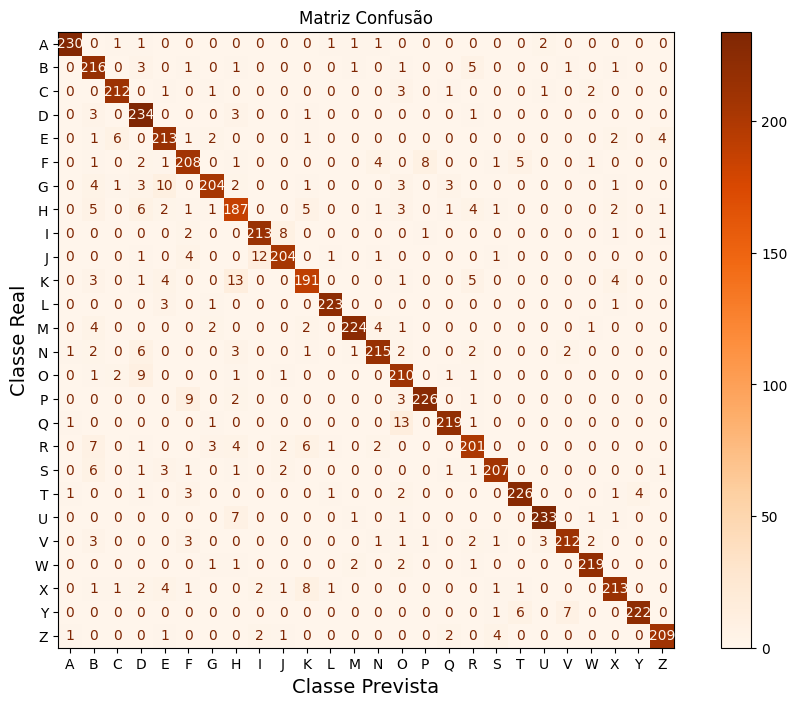

In [78]:
# avaliando o classificador com todos os parâmetros
activity.loc['knn'], conf_matrix_knn = knn_classifier(x_train_bal, x_test, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

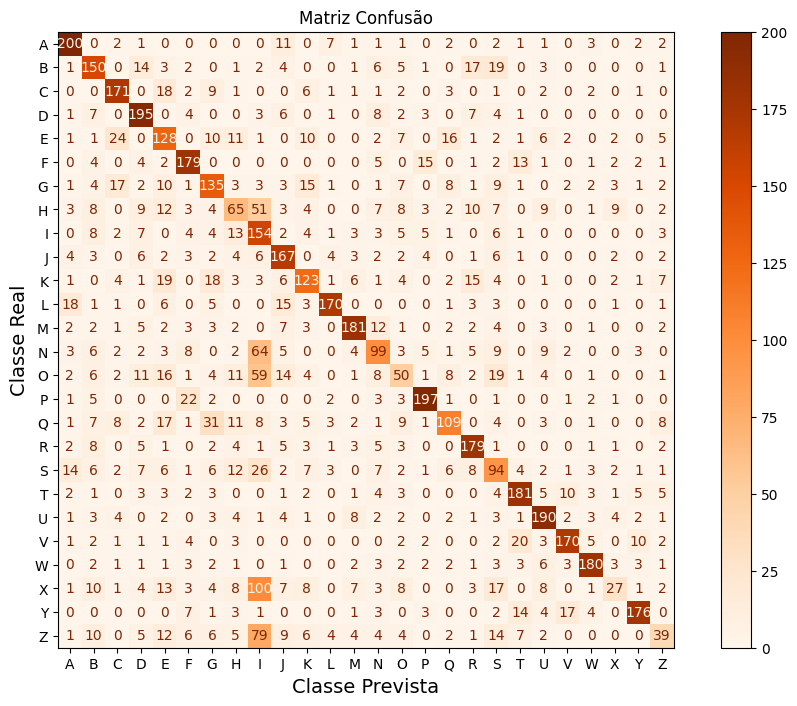

In [79]:
# k-NN com n parâmetros de maior correlação
activity.loc['knn_corr'], conf_matrix_knn_corr = knn_classifier(x_train_corr, x_test_corr, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

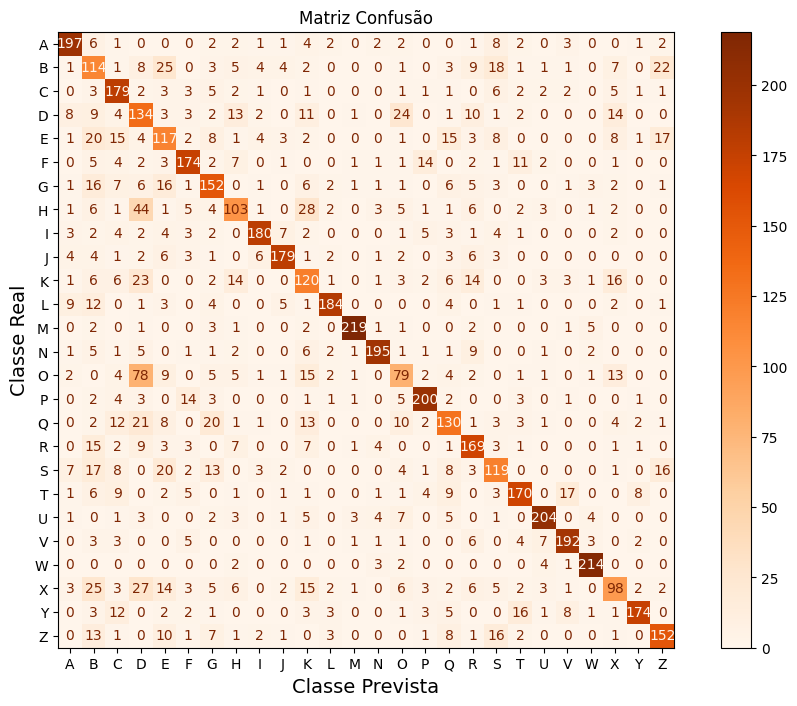

In [80]:
# k-NN com n parâmetros de maior informação mútua
activity.loc['knn_mutual'], conf_matrix_knn_mutual_info = knn_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

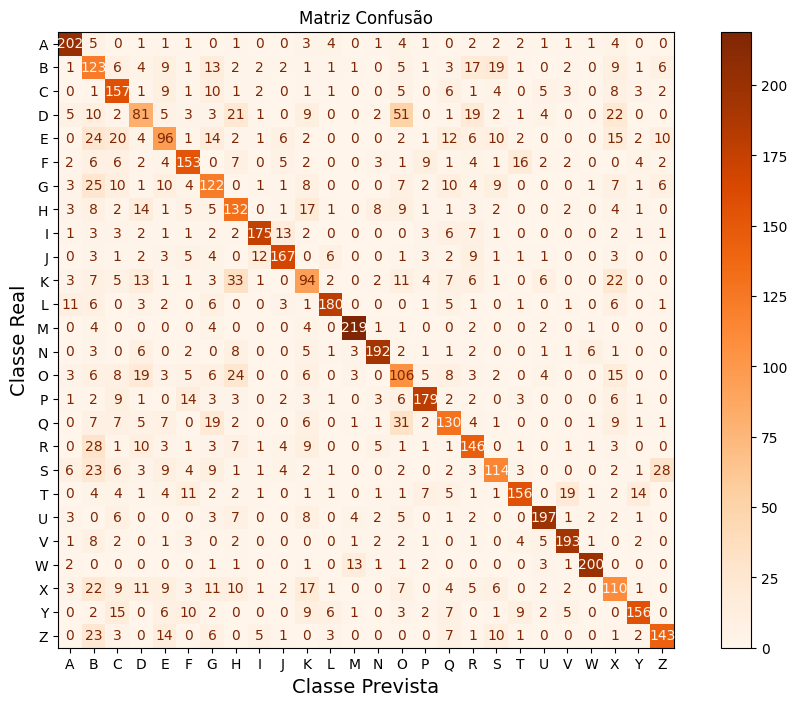

In [81]:
# k-NN com n parâmetros de maior razão discriminante de Fisher
activity.loc['knn_fisher'], conf_matrix_knn_fisher = knn_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

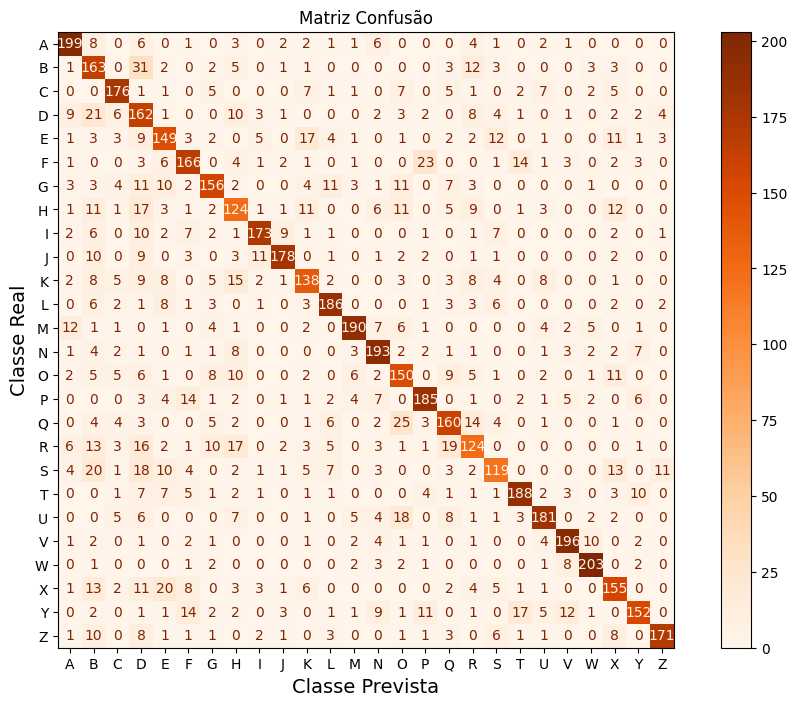

In [82]:
# k-NN com n parâmetros da PCA
activity.loc['knn_pca'], conf_matrix_knn_pca = knn_classifier(x_train_pca, x_test_pca, y_train_bal, y_test, k)

disp_matriz(conf_matrix_knn_pca, classes)

### <font color = yellow> Classificadores Linear

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

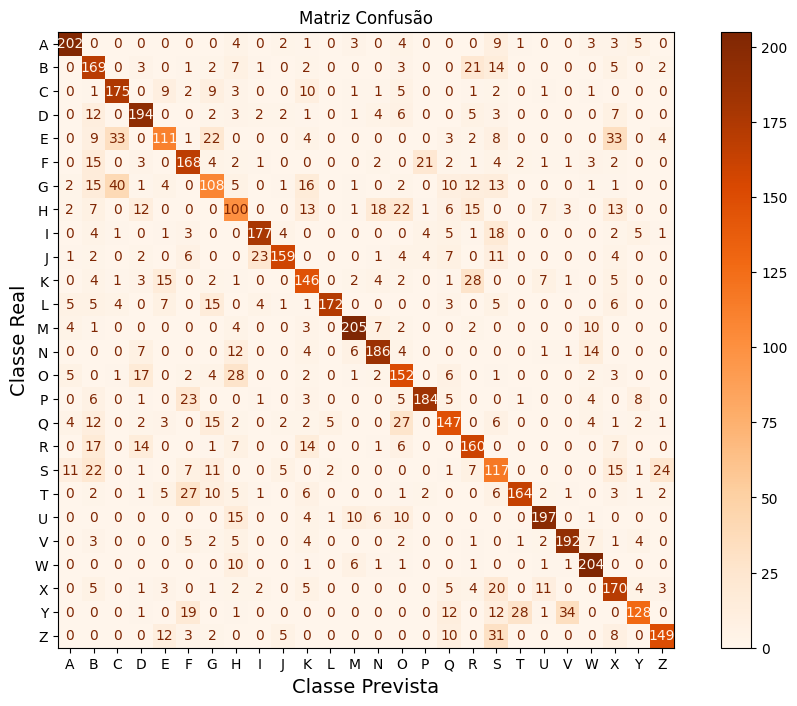

In [83]:
# avaliando o classificador com todos os parâmetros
activity.loc['lda'], conf_matrix_lda = lda_classifier(x_train_bal, x_test, y_train_bal, y_test)

disp_matriz(conf_matrix_lda, classes)

#### <font color = lightyellow> ***02*** - Utilizando os n parâmentros de maior correlação

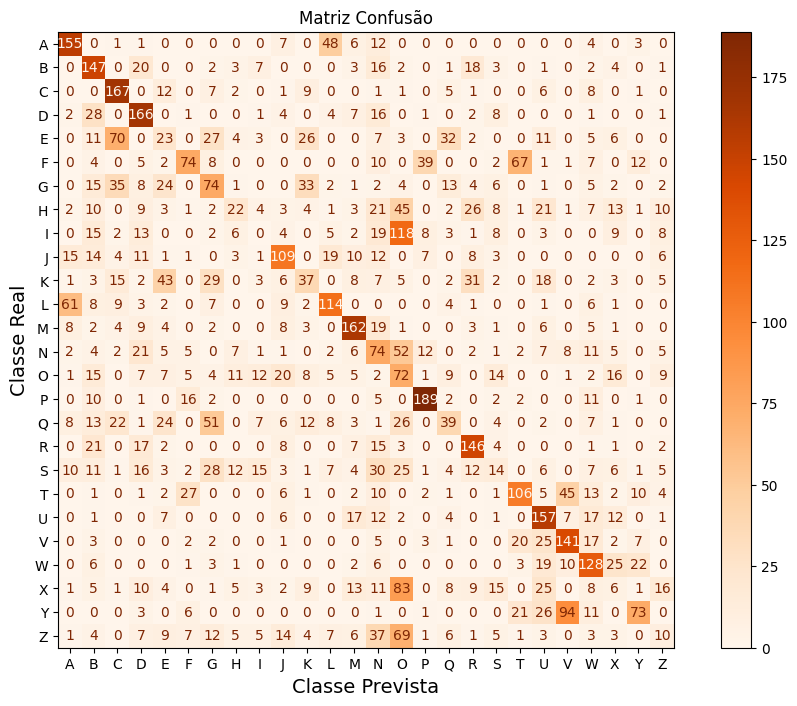

In [84]:
# LDA com n parâmetros de maior correlação
activity.loc['lda_corr'], conf_matrix_lda_corr = lda_classifier(x_train_corr, x_test_corr, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_corr, classes)

#### <font color = lightyellow> ***03*** - Utilizando os n parâmentros de maior informação mútua

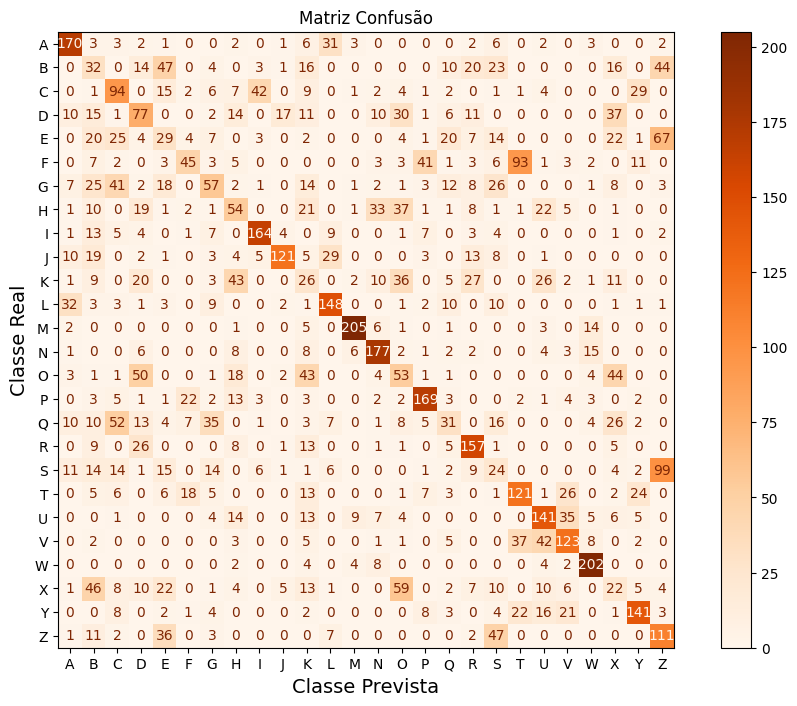

In [85]:
# LDA com n parâmetros de maior informação mútua
activity.loc['lda_mutual'], conf_matrix_lda_mutual_info = lda_classifier(x_train_mutual_info, x_test_mutual_info, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_mutual_info, classes)

#### <font color = lightyellow> ***04*** - Utilizando os n parâmentros de maior discriminante de Fisher

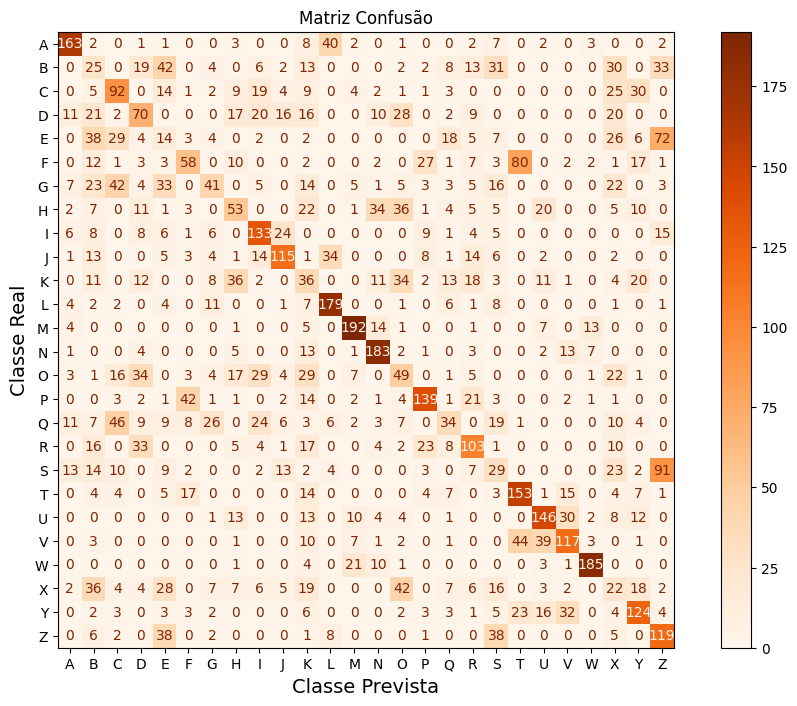

In [86]:
# LDA com n parâmetros de maior razão discriminante de Fisher
activity.loc['lda_fisher'], conf_matrix_lda_fisher = lda_classifier(x_train_fisher, x_test_fisher, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_fisher, classes)

#### <font color = lightyellow> ***05*** - Utilizando os n parâmentros do PCA

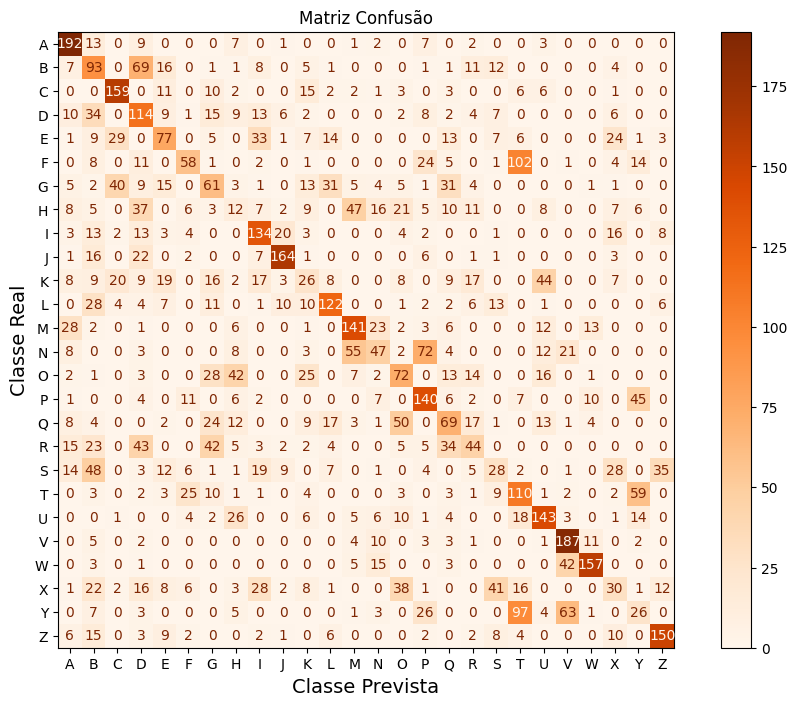

In [87]:
# LDA com n parâmetros da PCA
activity.loc['lda_pca'], conf_matrix_lda_pca = lda_classifier(x_train_pca, x_test_pca, y_train_bal, y_test)

disp_matriz(conf_matrix_lda_pca, classes)

### <font color = yellow> Classificadores baseado em uma rede neural MLP (Multilayer Perceptron)

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

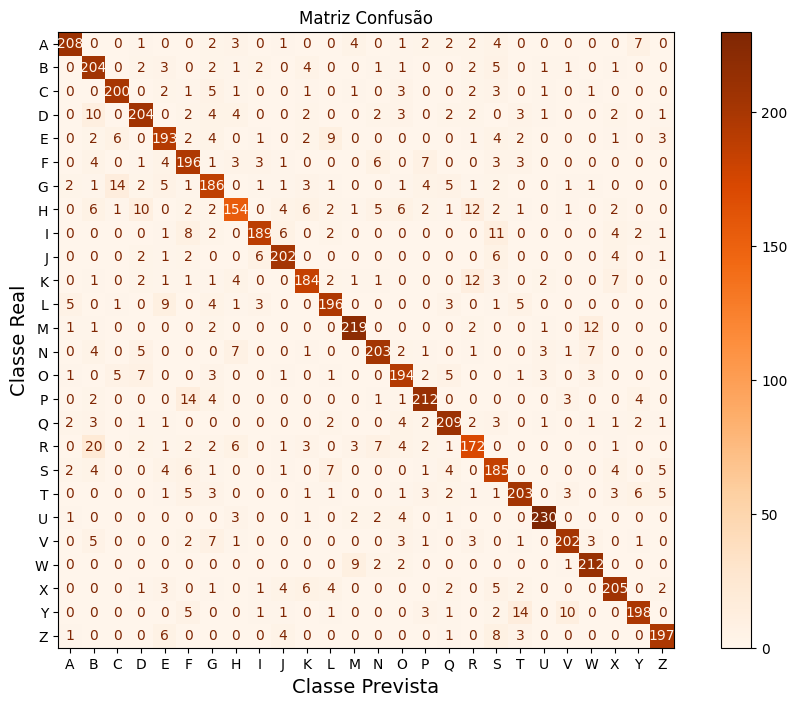

In [88]:
# avaliando o classificador com todos os parâmetros
activity.loc['mlp'], conf_matrix_mlp = mlp_classifier(x_train_bal, x_test, y_train_bal, y_test, max_inter, random_state)

disp_matriz(conf_matrix_mlp, classes)

### <font color = yellow> Classificadores baseado em máquinas de vetores de suporte não-linear (kernel função de base radial)

#### <font color = lightyellow> ***01*** - Utilizando todos os parâmetros de entrada

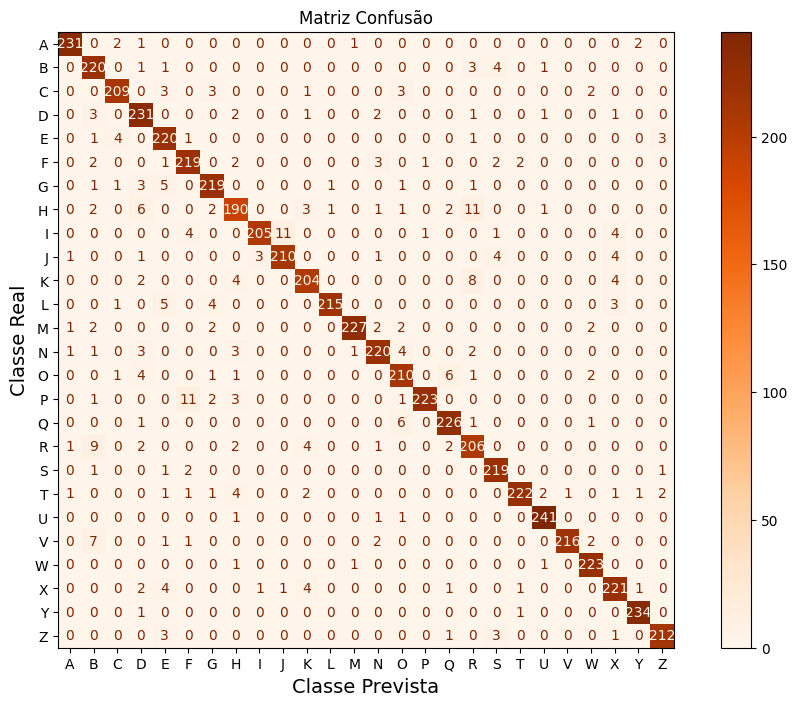

In [89]:
# avaliando o classificador com todos os parâmetros
activity.loc['svm'], conf_matrix_svm = svm_classifier(x_train_bal, x_test, y_train_bal, y_test, random_state)

disp_matriz(conf_matrix_svm, classes)

# <font color = green>***Considerações Finais***</font>

In [90]:
print("DataFrame contendo os indicadores: Acurácia, Sensibilidade e Especificidade, para cada um\n dos classificadores testados.")
activity

DataFrame contendo os indicadores: Acurácia, Sensibilidade e Especificidade, para cada um
 dos classificadores testados.


,accuracy,sensitivity,caracteristic
mahalanobis,0.6495,0.648421,0.667093
mahalanobis_corr,0.394833,0.3922,0.363729
mahalanobis_mutual,0.432333,0.431038,0.421586
mahalanobis_fisher,0.393833,0.392103,0.393784
mahalanobis_pca,0.3935,0.393099,0.381202
knn,0.9285,0.928171,0.929651
knn_corr,0.618167,0.615861,0.623359
knn_mutual,0.691333,0.690392,0.702934
knn_fisher,0.653833,0.653344,0.665021
knn_pca,0.722833,0.722348,0.732822


In [91]:
print(f"Com base na \033[1;31macurâcia\033[0m o melhor projeto de classificador é o \033[1;33m{activity['accuracy'].idxmax()}\033[0m com valor de: \033[1;33m{activity['accuracy'].max():.3%}\033[0m")
print(f"Com base na \033[1;31msensibilidade\033[0m o melhor projeto de classificador é o \033[1;33m{activity['sensitivity'].idxmax()}\033[0m com valor de: \033[1;33m{activity['sensitivity'].max():.3%}\033[0m")
print(f"Com base na \033[1;31mespecificidades\033[0m o melhor projeto de classificador é o \033[1;33m{activity['caracteristic'].idxmax()}\033[0m com valor de: \033[1;33m{activity['caracteristic'].max():.3%}\033[0m")

Com base na acurâcia o melhor projeto de classificador é o svm com valor de: 94.550%
Com base na sensibilidade o melhor projeto de classificador é o svm com valor de: 94.521%
Com base na especificidades o melhor projeto de classificador é o svm com valor de: 94.633%
